In [1]:
import pandas as pd  # pandas module for data manipulation
import re # Regular expression operations
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting
import numpy as np

# libraries required for scrapping
from bs4 import BeautifulSoup as soup
import requests
import time
from urllib.request import urlopen as urlRequest


# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Scraping data from FlipKart

In [2]:
#Web Scrapping main function
# def web_scrapping(page):
#     page_soup = soup(page.text, 'html.parser')                     #Parsing the large HTML file
#     containers = page_soup.findAll("div", {"class" : "_3liAhj"})   #Find all div tags which is a class and name of div tag:_3liAhj

#     for container in containers:
#         #Grabbing product name
#         product_name = container.findAll("a",{"class" : "_2cLu-l"})
#         product = product_name[0].text
        
#         #Fetching brand name
#         temp = product.split(" ")
#         if len(temp) <= 3:                  #Taking care of brands like "Dr. Oetker"
#             brand = temp[0] + " " + temp[1]
#         else:
#             brand = temp[0]
        
#         #Grabbing product discounted price and applying string manipulation to clean the data
#         discounted_price_container =  container.findAll("div", {"class" : "_1vC4OE"})
#         if len(discounted_price_container) == 0:
#             final_discounted_price = 'NA'
#         else:
#             discounted_price = discounted_price_container[0].text.strip()
#             split_price = discounted_price.split('₹')
#             final_discounted_price = 'Rs.' + split_price[1]
        
#         #Grabbing % of dicount offered and applying string manipulation to clean the data
#         discount_container = container.findAll("div", {"class" : "VGWI6T"})
#         if len(discount_container) == 0:
#             final_discount = '0%'
#         else:
#             discount = discount_container[0].text.split(" ")
#             final_discount = discount[0]
        
#         #Grabbing original price and applying string manipulation to clean the data
#         original_price_container =  container.findAll("div", {"class" : "_3auQ3N"})
#         if len(original_price_container) == 0:
#             final_original_price = final_discounted_price
#         else:
#             original_price = original_price_container[0].text.strip()
#             split_original_price = original_price.split('₹')
#             final_original_price = 'Rs.' + split_original_price[1]
        
#         #Grabbing product rating and applying string manipulation to clean the data
#         rating_container = container.findAll("div", {"class" : "hGSR34"})
#         if len(rating_container) == 0:
#             final_rating = 'NA'
#         else:
#             rating = rating_container[0].text
#             split_rating = rating.split('(')
#             final_rating = split_rating[0]
        
#         #Grabbing total number of ratings done by people and applying string manipulation to clean the data
#         total_ratings_by_people = container.findAll("span", {"class" : "_38sUEc"})
#         if len(total_ratings_by_people) == 0:
#             total_ratings = "NA"
#         else:
#             total_ratings = total_ratings_by_people[0].text
#             total_ratings = total_ratings[1:len(total_ratings)-1]
            
#         #Grabbing product urls
#         temp_product_url_container =  container.find("a", {"class" : '_2cLu-l'})['href']
#         product_url_container = 'https://www.flipkart.com' + temp_product_url_container
        
#         #Appending data to their respective lists
#         Product_name.append(product)
#         Brand.append(brand)
#         Discounted_Price.append(final_discounted_price)
#         Discount.append(final_discount)
#         Original_Price.append(final_original_price)
#         Ratings.append(final_rating)
#         Total_Ratings.append(total_ratings)
#         Product_URL.append(product_url_container)

In [3]:
#Connection establishment function to establish a connection to the mentioned URL
# def connection_establishment(page_number,url):
#         page = requests.get(search_url)
#         if page.status_code == requests.codes.ok:           #Checking the response code as 200 then proceeding for scrapping
#             print(f'Connection succeeded with {page_number} URL')
#             try:
#                 web_scrapping(page)
#             except:
#                 print('Something went wrong! Retrying scrapping from the next page')
                
#         else:
#             print('Connection failed')                     #In case 200 response not received

In [4]:
# #Some declarations 
# page_number = 1                 #Initialising page number to start with
# starting_page_index = 1         #Starting page to start scrapping 
# ending_page_index = 200       #Ending page to end scrapping 

# Product_name = []
# Brand = []
# Discounted_Price = []
# Discount = []
# Original_Price = []
# Ratings = []
# Total_Ratings = []
# Product_URL = []

# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.flipkart.com/food-nutrition/pr?sid=7jv&marketplace=FLIPKART&page='+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(10)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1

# #Creating a dataframe
# groceries = pd.DataFrame(
# {
#     'Product_name' : Product_name,
#     'Brand' : Brand,
#     'Discounted_Price' : Discounted_Price,
#     'Discount' : Discount,
#     'Original_Price' : Original_Price,
#     'Ratings' : Ratings,
#     'Total_Ratings' : Total_Ratings,
#     'Product_URL' : Product_URL,
# })

# #Resetting index to start from 1
# groceries.index = groceries.index + 1
# print(groceries)

# #Exporting to a csv file
# groceries.to_csv('flipkart_web_scrapped_data.csv', encoding='utf-8')

### Cleaning Flipkart Data

In [5]:
#Importing the data
df = pd.read_csv("flipkart_web_scrapped_data.csv",index_col=0)  
df.head()       #Checking top 5 rows

,Product_name,Brand,Discounted_Price,Discount,Original_Price,Ratings,Total_Ratings,Product_URL
1,Cadbury Bournvita Health Drink Nutrition Drink,Cadbury,Rs.286,1%,Rs.290,4.5,"11,923",https://www.flipkart.com/cadbury-bournvita-hea...
2,Betty Crocker Triple Choco Brownie Mix 425 g,Betty,Rs.322,2%,Rs.330,4.4,294,https://www.flipkart.com/betty-crocker-triple-...
3,Madhur Sugar,Madhur Sugar,Rs.48,12%,Rs.55,4.5,"17,460",https://www.flipkart.com/madhur-sugar/p/itmevj...
4,Tata Iodized Salt,Tata Iodized,Rs.20,0%,Rs.20,4.6,"7,287",https://www.flipkart.com/tata-iodized-salt/p/i...
5,Roxy Gold Maida,Roxy Gold,Rs.55,0%,Rs.55,4.4,"1,828",https://www.flipkart.com/roxy-gold-maida/p/itm...


In [6]:
#Printing total rows and columns and also having a glance at the data types
print(df.shape)
df.info()

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      1000 non-null   object 
 1   Brand             1000 non-null   object 
 2   Discounted_Price  1000 non-null   object 
 3   Discount          1000 non-null   object 
 4   Original_Price    1000 non-null   object 
 5   Ratings           922 non-null    float64
 6   Total_Ratings     922 non-null    object 
 7   Product_URL       1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 70.3+ KB


In [7]:
#Dropping the prefix 'Rs.' from column Original_Price, Discounted_Price.
#Dropping suffix '%' from the rows of column Discount.

df.Original_Price = df.Original_Price.str.replace("Rs.","").str.replace(",","")
df.Discounted_Price = df.Discounted_Price.str.replace("Rs.","").str.replace(",","")
df.Discount = df.Discount.str.replace("%","")
df.Total_Ratings = df.Total_Ratings.str.replace(",","")

#Printing top five rows to have a glance at the modification applied
df.head()

,Product_name,Brand,Discounted_Price,Discount,Original_Price,Ratings,Total_Ratings,Product_URL
1,Cadbury Bournvita Health Drink Nutrition Drink,Cadbury,286,1,290,4.5,11923,https://www.flipkart.com/cadbury-bournvita-hea...
2,Betty Crocker Triple Choco Brownie Mix 425 g,Betty,322,2,330,4.4,294,https://www.flipkart.com/betty-crocker-triple-...
3,Madhur Sugar,Madhur Sugar,48,12,55,4.5,17460,https://www.flipkart.com/madhur-sugar/p/itmevj...
4,Tata Iodized Salt,Tata Iodized,20,0,20,4.6,7287,https://www.flipkart.com/tata-iodized-salt/p/i...
5,Roxy Gold Maida,Roxy Gold,55,0,55,4.4,1828,https://www.flipkart.com/roxy-gold-maida/p/itm...


In [8]:
#Checking for null or missing values in my data
df.isnull().sum()

Product_name         0
Brand                0
Discounted_Price     0
Discount             0
Original_Price       0
Ratings             78
Total_Ratings       78
Product_URL          0
dtype: int64

In [9]:
#Replacing Nan values with zero
df["Total_Ratings"] = df["Total_Ratings"].fillna(0)
df["Ratings"] = df["Ratings"].fillna(0)

In [10]:
#Changing data types for column Discounted_Price, Discount, Original_Price
convert_dict = {'Discounted_Price' : float, 
                'Discount' : float,
                'Original_Price' : float,
                'Total_Ratings' : int,
               }

df = df.astype(convert_dict) 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      1000 non-null   object 
 1   Brand             1000 non-null   object 
 2   Discounted_Price  1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Original_Price    1000 non-null   float64
 5   Ratings           1000 non-null   float64
 6   Total_Ratings     1000 non-null   int64  
 7   Product_URL       1000 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 70.3+ KB
None


In [11]:
#Checking for null or missing values in my data
df.isnull().sum()

Product_name        0
Brand               0
Discounted_Price    0
Discount            0
Original_Price      0
Ratings             0
Total_Ratings       0
Product_URL         0
dtype: int64

In [12]:
#Checking for incorrect discount price calculations
incorrect_values_container = []
for ind in df.index:
    cal = df['Original_Price'][ind] - (df['Original_Price'][ind] * df['Discount'][ind])
    if cal == df['Discounted_Price'][ind]:
        incorrect_values_container.append(ind)
print(incorrect_values_container)
print("Total discrepancies found: ",len(incorrect_values_container))

[4, 5, 13, 19, 21, 22, 31, 53, 69, 75, 97, 103, 106, 112, 113, 122, 132, 133, 141, 143, 146, 147, 156, 157, 183, 188, 189, 193, 201, 219, 225, 230, 231, 240, 255, 258, 265, 272, 273, 283, 297, 298, 307, 313, 343, 379, 385, 386, 394, 400, 418, 428, 489, 496, 501, 502, 510, 518, 520, 526, 536, 547, 559, 562, 586, 589, 615, 632, 657, 666, 681, 698, 713, 721, 725, 741, 752, 765, 767, 783, 828, 855, 863, 903, 921, 946, 952, 955, 957, 986, 988]
Total discrepancies found:  91


In [13]:
#Dropping these records from df
print("Total records before dropping incorrect data of rows: ",df.shape[0])

df = df.drop(incorrect_values_container, axis=0)

print("Total records after dropping incorrect data of rows: ",df.shape[0])

Total records before dropping incorrect data of rows:  1000
Total records after dropping incorrect data of rows:  909


In [14]:
df.reset_index(inplace = True, drop = True)    #Resetting the indices
df.index = df.index + 1 
df

,Product_name,Brand,Discounted_Price,Discount,Original_Price,Ratings,Total_Ratings,Product_URL
1,Cadbury Bournvita Health Drink Nutrition Drink,Cadbury,286.0,1.0,290.0,4.5,11923,https://www.flipkart.com/cadbury-bournvita-hea...
2,Betty Crocker Triple Choco Brownie Mix 425 g,Betty,322.0,2.0,330.0,4.4,294,https://www.flipkart.com/betty-crocker-triple-...
3,Madhur Sugar,Madhur Sugar,48.0,12.0,55.0,4.5,17460,https://www.flipkart.com/madhur-sugar/p/itmevj...
4,Fortune Sunlite Refined Sunflower Oil Can,Fortune,591.0,13.0,685.0,4.5,1660,https://www.flipkart.com/fortune-sunlite-refin...
5,Emami Healthy & Tasty Kachchi Ghani Mustard Oi...,Emami,133.0,14.0,155.0,4.4,1138,https://www.flipkart.com/emami-healthy-tasty-k...
6,Parry's White Label Sugar,Parry's,59.0,1.0,60.0,4.4,4625,https://www.flipkart.com/parry-s-white-label-s...
7,Tata Sampann Fine Besan,Tata,52.0,18.0,64.0,4.5,1960,https://www.flipkart.com/tata-sampann-fine-bes...
8,Flipkart Supermart Select Sooji/Rava,Flipkart,58.0,22.0,75.0,4.4,556,https://www.flipkart.com/flipkart-supermart-se...
9,Fortune Refined Soyabean Oil Pouch,Fortune,116.0,10.0,130.0,4.4,1043,https://www.flipkart.com/fortune-refined-soyab...
10,Nandini Pure Cow Ghee 500 ml Pouch,Nandini,244.0,0.0,245.0,4.4,2198,https://www.flipkart.com/nandini-pure-cow-ghee...


In [15]:
#Checking for duplicates 
df.Product_name.value_counts()

Cadbury Bournvita Health Drink Nutrition Drink                23
Cadbury Bournvita Inner Strength Nutrition Drink              22
Betty Crocker Triple Choco Brownie Mix 425 g                  22
Tang Mango Instant Drink Mix                                  22
Saffola Aura Extra Virgin Olive and Flaxseed EV Blended...    22
Tang Orange Instant Drink Mix                                 22
Saffola Fittify Gourmet Slim Meal Shake Whey Protein          21
Saffola Aura Extra Virgin Olive and Flaxseed Blended Oi...    19
Optimum Nutrition Gold Standard 100% Whey Protein             12
FARMUP Yellow Combo (Split)                                    8
FARMUP Combo                                                   4
Saffola Fittify Gourmet Lemon Mint Instant Coffee              4
Optimum Nutrition Serious Mass Weight Gainers/Mass Gain...     3
MuscleBlaze Super Gainer XXL Weight Gainers/Mass Gainer...     3
MuscleBlaze 100% Ultra Premium Whey Protein                    2
Optimum Nutrition Amino E

In [16]:
df.drop_duplicates("Product_name",inplace=True)
df.reset_index(drop=True,inplace=True)
df.index = df.index + 1 
print("Total records after dropping duplicates: ",df.shape[0])

Total records after dropping duplicates:  699


In [17]:
# Finally adding a column for platform.
df['Platform']='Flipkart'


In [18]:
# For the ease sake and to work with other's data, creating one more csv for integration.
df.to_csv('Flipkart_data_cleaned.csv', index=False, header=True)

In [19]:
print('Final cleaned dataset obtained: ')
df

Final cleaned dataset obtained: 


,Product_name,Brand,Discounted_Price,Discount,Original_Price,Ratings,Total_Ratings,Product_URL,Platform
1,Cadbury Bournvita Health Drink Nutrition Drink,Cadbury,286.0,1.0,290.0,4.5,11923,https://www.flipkart.com/cadbury-bournvita-hea...,Flipkart
2,Betty Crocker Triple Choco Brownie Mix 425 g,Betty,322.0,2.0,330.0,4.4,294,https://www.flipkart.com/betty-crocker-triple-...,Flipkart
3,Madhur Sugar,Madhur Sugar,48.0,12.0,55.0,4.5,17460,https://www.flipkart.com/madhur-sugar/p/itmevj...,Flipkart
4,Fortune Sunlite Refined Sunflower Oil Can,Fortune,591.0,13.0,685.0,4.5,1660,https://www.flipkart.com/fortune-sunlite-refin...,Flipkart
5,Emami Healthy & Tasty Kachchi Ghani Mustard Oi...,Emami,133.0,14.0,155.0,4.4,1138,https://www.flipkart.com/emami-healthy-tasty-k...,Flipkart
6,Parry's White Label Sugar,Parry's,59.0,1.0,60.0,4.4,4625,https://www.flipkart.com/parry-s-white-label-s...,Flipkart
7,Tata Sampann Fine Besan,Tata,52.0,18.0,64.0,4.5,1960,https://www.flipkart.com/tata-sampann-fine-bes...,Flipkart
8,Flipkart Supermart Select Sooji/Rava,Flipkart,58.0,22.0,75.0,4.4,556,https://www.flipkart.com/flipkart-supermart-se...,Flipkart
9,Fortune Refined Soyabean Oil Pouch,Fortune,116.0,10.0,130.0,4.4,1043,https://www.flipkart.com/fortune-refined-soyab...,Flipkart
10,Nandini Pure Cow Ghee 500 ml Pouch,Nandini,244.0,0.0,245.0,4.4,2198,https://www.flipkart.com/nandini-pure-cow-ghee...,Flipkart


### Scraping data from Amazon Pantry

#### Information that needs to be extracted.

- Product Name
- Discounted Price
- Discount percentage
- Original Price
- Rating
- No.or ratings
- url

In [ ]:
def amazon_scraping():
    products = [];
    total_pages = 5
    store_products = []
    for i in range(total_pages):
        if(i>=1):
            print("page:", i)
            url = "https://www.amazon.in/s?i=grocery&rh=n%3A2454178031%2Cn%3A2454179031%2Cn%3A4859482031&page="+str(i+1)+"&qid=1591099869&ref=sr_pg_"+str(i)
            print(url)
            headers = {
                'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'
            }

            res = requests.get(url, headers=headers, timeout=30)
            soup = BeautifulSoup(res.text,"html.parser")
            containers = soup.findAll("div", {"data-component-type":"s-search-result"})
            print("Container length is : ",len(containers))    
            for container in containers:
                products.append(container)

    for product in products:
    #     print("=========================================================================================")

        product_name = product.find("span",{"class":"a-size-base-plus"}).text.strip()
    #     print("Name : ",product_name)

        discounted_price_tag = product.find("span",{"class":"a-price-whole"})
        if discounted_price_tag is None:
            discounted_price = ""
        else:
            discounted_price = discounted_price_tag.text
    #     print("discounted_price_tag : ",discounted_price)


        discount_tag = product.find("span",{"class":"a-letter-space"})
        if discount_tag is not None:
            discount = discount_tag.next_element.text
            discount = discount.split(" ")
            if(len(discount) == 3):
                discount = discount[2]
                char1 = '('
                char2 = ')'
                discount = discount[discount.find(char1)+1 : discount.find(char2)]
            else:
                discount = "0%"
        else:
            discount = "0%"
    #     print("discount : ",discount)

        original_price_tag = product.find("span",{"data-a-color":"secondary"})
        if original_price_tag is None:
            original_price = ""
        else:
            original_price = original_price_tag.next_element.text
    #     print("original_price : ",original_price)

        product_rating_tag = product.find("span",{"class":"a-icon-alt"})
        if product_rating_tag is None:
            product_rating = ""
        else:
            product_rating = product_rating_tag.text.split(" ")[0]
    #     print("product_rating : ",product_rating)

        product_total_ratings_tag = product.find("span",{"class":"a-size-base"})
        if product_total_ratings_tag is None:
            product_total_ratings = ""
        else:
            product_total_ratings = product_total_ratings_tag.text
    #     print("product_total_ratings : ",product_total_ratings)

        product_src = product.div.a["href"]
        url_prefix = "https://www.amazon.in"
        product_url = url_prefix+product_src
    #     print("product_url : ",product_url)


        store_product = [product_name, discounted_price, discount, original_price, product_rating,
                         product_total_ratings,product_url]
        store_products.append(store_product)
    return store_products
    print(len(store_products))

In [ ]:
# amazon_products = amazon_scraping()
# print(len(amazon_products))

In [22]:
# Saving the amazon pantry data fetched using scraping into CSV

# header = ['Product_Name', 'Discounted_Price', 'Discount', 'Original_Price', 'Rating', 'No_of_ratings', 'itemURL']
# my_df = pd.DataFrame(amazon_products, columns=header)
# my_df.head()
# my_df.to_csv('amazon_pantry.csv', index=False, header=True)

### Cleaning Amazon Pantry Data

- [x] Find Nulls/NANs by using the extra column provided.
- [x] Change the data types appropriately.
- [x] Remove ₹ prefix.
- [x] Clean the rows which have price as 0
- [x] Remove Duplicates.


In [23]:
# After Scraping the data from amazon, stored the data into CSV and started working from that dataset.
amazon_pantry_df = pd.read_csv("amazon_pantry.csv");
amazon_pantry_df

,Product_Name,Discounted_Price,Discount,Original_Price,Rating,No_of_ratings,itemURL
0,SHRILALMAHAL Fitness Brown Basmati Rice (Weigh...,559.0,20%,₹700,3.9,Sponsored,https://www.amazon.in/gp/slredirect/picassoRed...
1,"NutroActive BrownXatta, HIGH Protein & Low Car...",312.0,4%,₹324,3.8,Sponsored,https://www.amazon.in/gp/slredirect/picassoRed...
2,NutroActive BrownXatta High Protein & Low Carb...,2098.0,17%,"₹2,520",3.7,Sponsored,https://www.amazon.in/gp/slredirect/picassoRed...
3,Toor Dal Economy 1Kg,102.0,15%,₹120,4.1,66,https://www.amazon.in/ASOP-Toor-Dal-Economy-1K...
4,"Amazon Brand - Vedaka Popular Chana Dal, 1 kg",85.0,29%,₹120,4.3,100,https://www.amazon.in/Amazon-Brand-Vedaka-Popu...
5,"Aashirvaad Svasti Ghee, 1L",535.0,0%,NaN,4.4,1045,https://www.amazon.in/Aashirvaad-Svasti-Ghee-1...
6,"Daawat Rozana Gold Basmati Rice, 5kg",374.0,16%,₹446,3.8,649,https://www.amazon.in/Daawat-Rozana-Gold-Basma...
7,"Daawat Super Basmati, 1kg with 25% Extra",139.0,13%,₹160,4.2,770,https://www.amazon.in/Daawat-Super-Basmati-1kg...
8,"Amazon Brand - Vedaka Premium Toor Dal, 1kg",118.0,16%,₹140,4.2,1183,https://www.amazon.in/Amazon-Brand-Vedaka-Prem...
9,"Tata Sampann Unpolished Toor Dal/Arhar Dal, 1kg",149.0,0%,NaN,4.5,692,https://www.amazon.in/Tata-Sampann-Pulses-Toor...


In [24]:
#Checking for null or missing values in my data
amazon_pantry_df.isnull().sum()

Product_Name          0
Discounted_Price     58
Discount              0
Original_Price      162
Rating               21
No_of_ratings        16
itemURL               0
dtype: int64

In [25]:
#Replacing Nan values with zero
amazon_pantry_df["No_of_ratings"] = amazon_pantry_df["No_of_ratings"].fillna(0)
amazon_pantry_df["Rating"] = amazon_pantry_df["Rating"].fillna(0)

In [26]:
amazon_pantry_df.isnull().sum()

Product_Name          0
Discounted_Price     58
Discount              0
Original_Price      162
Rating                0
No_of_ratings         0
itemURL               0
dtype: int64

In [27]:
#Dropping the prefix 'Rs.' from column Original_Price, Discounted_Price.
#Dropping suffix '%' from the rows of column Discount.

amazon_pantry_df["Original_Price"] = amazon_pantry_df.loc[:,"Original_Price"].str.replace("₹","").str.replace(",","")
amazon_pantry_df["Discount"] = amazon_pantry_df["Discount"].str.replace("%","")
amazon_pantry_df["No_of_ratings"] = amazon_pantry_df["No_of_ratings"].str.replace("Sponsored","0")
amazon_pantry_df.loc[amazon_pantry_df["No_of_ratings"].str.contains(r'.*Save.*',na=False)] = '0'

In [28]:
# Printing total rows and columns and also having a glance at the data types
print("Shape of data: ", amazon_pantry_df.shape)
amazon_pantry_df.info()

Shape of data:  (570, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      570 non-null    object
 1   Discounted_Price  512 non-null    object
 2   Discount          570 non-null    object
 3   Original_Price    408 non-null    object
 4   Rating            570 non-null    object
 5   No_of_ratings     554 non-null    object
 6   itemURL           570 non-null    object
dtypes: object(7)
memory usage: 31.3+ KB


In [29]:
amazon_pantry_df.shape

# Dropping the NA records from df
print("Total records before dropping incorrect data of rows: ",amazon_pantry_df.shape[0])
    
amazon_pantry_df = amazon_pantry_df.dropna()

print("Total records after dropping incorrect data of rows: ",amazon_pantry_df.shape[0])

Total records before dropping incorrect data of rows:  570
Total records after dropping incorrect data of rows:  398


In [30]:
#Changing data types for column Discounted_Price, Discount, Original_Price
convert_dict = {'Discounted_Price' : float, 
                'Discount' : float,
                'Original_Price' : float,
                'No_of_ratings' : int,
               }

amazon_pantry_df = amazon_pantry_df.astype(convert_dict) 
print(amazon_pantry_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 569
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      398 non-null    object 
 1   Discounted_Price  398 non-null    float64
 2   Discount          398 non-null    float64
 3   Original_Price    398 non-null    float64
 4   Rating            398 non-null    object 
 5   No_of_ratings     398 non-null    int64  
 6   itemURL           398 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 24.9+ KB
None


In [31]:
# Identified that there are rows with price as 0. So, removing them
# df = df[df['Discounted_Price'] !=0]
# df = df[df['Discounted_Price'] != 0.0]
amazon_pantry_df = amazon_pantry_df[amazon_pantry_df['Discounted_Price'] != 0]
# df = df[(df["Discounted_Price"] != 0).all(axis=1)]

In [32]:
#Checking for duplicates 
# print(amazon_pantry_df.Product_Name.value_counts())
#Checking for duplicates 
duplicateDFRow = len(amazon_pantry_df[amazon_pantry_df.duplicated(['Product_Name'])])
print(duplicateDFRow)

98


In [33]:
print("Total records before dropping duplicates: ",amazon_pantry_df.shape[0])
amazon_pantry_df.drop_duplicates("Product_Name",inplace=True)
amazon_pantry_df.reset_index(drop=True,inplace=True)
amazon_pantry_df.index = amazon_pantry_df.index + 1 
print("Total records after dropping duplicates: ",amazon_pantry_df.shape[0])

Total records before dropping duplicates:  393
Total records after dropping duplicates:  295


In [34]:
# Finally adding a column for platform.
amazon_pantry_df['Platform']='Amazon'


In [35]:
# Final cleaned dataset obtained:
# print('Final cleaned dataset obtained: ')
amazon_pantry_df

,Product_Name,Discounted_Price,Discount,Original_Price,Rating,No_of_ratings,itemURL,Platform
1,SHRILALMAHAL Fitness Brown Basmati Rice (Weigh...,559.0,20.0,700.0,3.9,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon
2,"NutroActive BrownXatta, HIGH Protein & Low Car...",312.0,4.0,324.0,3.8,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon
3,NutroActive BrownXatta High Protein & Low Carb...,2098.0,17.0,2520.0,3.7,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon
4,Toor Dal Economy 1Kg,102.0,15.0,120.0,4.1,66,https://www.amazon.in/ASOP-Toor-Dal-Economy-1K...,Amazon
5,"Amazon Brand - Vedaka Popular Chana Dal, 1 kg",85.0,29.0,120.0,4.3,100,https://www.amazon.in/Amazon-Brand-Vedaka-Popu...,Amazon
6,"Daawat Rozana Gold Basmati Rice, 5kg",374.0,16.0,446.0,3.8,649,https://www.amazon.in/Daawat-Rozana-Gold-Basma...,Amazon
7,"Daawat Super Basmati, 1kg with 25% Extra",139.0,13.0,160.0,4.2,770,https://www.amazon.in/Daawat-Super-Basmati-1kg...,Amazon
8,"Amazon Brand - Vedaka Premium Toor Dal, 1kg",118.0,16.0,140.0,4.2,1183,https://www.amazon.in/Amazon-Brand-Vedaka-Prem...,Amazon
9,Kabuli Chana Economy 1Kg,81.0,10.0,90.0,3.9,97,https://www.amazon.in/ASOP-Kabuli-Chana-Econom...,Amazon
10,"Fortune Chakki Fresh Atta, 5kg",199.0,26.0,270.0,4,221,https://www.amazon.in/Fortune-Chakki-Fresh-Att...,Amazon


In [36]:
amazon_pantry_df.describe()

,Discounted_Price,Discount,Original_Price,No_of_ratings
count,295.000000,295.000000,295.000000,295.000000
mean,310.830508,18.664407,410.630508,135.284746
std,284.396255,13.927873,454.927769,257.334281
min,46.000000,0.000000,50.000000,0.000000
25%,125.000000,8.000000,160.000000,7.000000
50%,220.000000,15.000000,270.000000,32.000000
75%,385.000000,26.000000,500.000000,111.500000
max,2098.000000,78.000000,4149.000000,2442.000000


In [37]:
# For the ease sake and to work with other's data, creating one more csv for integration.
amazon_pantry_df.to_csv('amazon_pantry_cleaned.csv', index=False, header=True)


### Scraping JIOMart Data

In [38]:
# #Web Scrapping product url
# def get_rating(product_url):
#     product_page = requests.get(product_url)
#     if product_page.status_code == requests.codes.ok:   #Checking the response code as 200 then proceeding for scrapping
#         try:
#             prod_url_soup = soup(product_page.text, 'html.parser')                     #Parsing the large HTML file
            
#             #Grabbing product rating
#             rating_content = prod_url_soup.find("div",attrs = {"class" : "rating-content"}).text
#             rating_string = rating_content.split(" ")
#             product_rating = rating_string[1][:1]
            
#             #Grabbing the number of ratings
#             no_of_ratings_text = prod_url_soup.find("span",attrs = {"class" : "total-rating-count"}).text
#             no_of_ratings = no_of_ratings_text[8:10]
            
#         except:
#             print('Something went wrong in scraping product url!')
#     else:
#         print('Connection failed to product url') 
#     return product_rating, no_of_ratings
    

In [39]:
# #Web Scrapping main fucntion
# def web_scrapping(page):
#     page_soup = soup(page.text, 'html.parser')                     #Parsing the large HTML file
#     containers = page_soup.findAll("div", {"class" : "col-md-3 p-0"})   
#                   #Find all div tags which is a class and name of div tag:row product-list

#     for container in containers:
        
#         #Grabbing product name
#         product = container.find("span",attrs = {"class" : "clsgetname"}).text
        
#         #Grabbing the discount
#         discount_container = container.findAll("span",{"class" : "dis_section"})
#         if len(discount_container) == 0:
#             discount = 0
#         else:
#             discount = discount_container[0].text[:-4]   #As part of EDA, removing 'off' string from discount
        
        
#         #Grabbing product discounted price and applying string manipulation to clean the data
#         discounted_price_container =  container.find("span",attrs = {"id" : "final_price"})
#         if len(discounted_price_container) == 0:
#             discounted_price = 'NA'
#         else:
#             discounted_price = discounted_price_container.text[3:] #As part of EDA, removing 'Rs.' string from price
        
        
#         #Grabbing original price and applying string manipulation to clean the data
#         original_price_container =  container.findAll("strike",{"id" : "price"})
#         if len(original_price_container) == 0:
#             original_price = discounted_price
#         else:
#             original_price = original_price_container[0].text[3:] #As part of EDA, removing 'Rs.' string from price
        
#         product_url = container.find("a",attrs = {"class" : "category_name"})['href']
        
#         #Grabbing product url
#         product_rating, no_of_ratings = get_rating(product_url)

#         #Appending data to their respective lists

#         Product_name.append(product)
#         Discount.append(discount)
#         Discounted_Price.append(discounted_price)
#         Original_Price.append(original_price)
#         Product_Url.append(product_url)
#         Product_Rating.append(product_rating)
#         No_of_ratings.append(no_of_ratings)

In [40]:
#Connection establishment function to establish a connection to the mentioned URL
# def connection_establishment(page_number,search_url):
#         page = requests.get(search_url)
#         if page.status_code == requests.codes.ok:           #Checking the response code as 200 then proceeding for scrapping
#             print(f'Connection succeeded with {page_number} URL')
#             try:
#                 web_scrapping(page)
#             except:
#                 print('Something went wrong! Retrying scrapping from the next page')
#         else:
#             print('Connection failed')                     #In case 200 response not received

In [41]:
# #Saving a URL to a variable from which data would be scrapped
# page_number = 1                 #Initialising page number to start with
# Product_name = []
# Discount = []
# Discounted_Price = []
# Original_Price = []
# Product_Url = []
# Product_Rating = []
# No_of_ratings = []
# starting_page_index = 1          #Starting page to start scrapping 
# ending_page_index = 6            #Ending page to end scrapping 

# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/staples/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1

# page_number = 1   
# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/snacks-branded-foods/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1

# page_number = 1   
# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/fruits-vegetables/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1

# page_number = 1   
# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/dairy-bakery/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1
    
# page_number = 1   
# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/personal-care/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1
    
# page_number = 1   
# for i in range(starting_page_index,ending_page_index):     
#     search_url = f'https://www.jiomart.com/category/home-care/page/'+ str(page_number)
#     connection_establishment(page_number,search_url)
#     time.sleep(5)              #Sleeping forced to prevent multiple requests flood on the website
#     page_number += 1

# #Creating a dataframe
# groceries = pd.DataFrame(
# {
#     'Product_name' : Product_name,
#     'Discount' : Discount,
#     'Discounted_Price' : Discounted_Price,
#     'Original_Price' : Original_Price,
#     'Product_Url' : Product_Url,
#     'Product_Rating' : Product_Rating,
#     'No_of_ratings'  : No_of_ratings,
#     'Platform' : "Jiomart"
#    })

# #Resetting index to start from 1
# groceries.index = groceries.index + 1
# print(groceries)

# #Exporting to a csv file
# groceries.to_csv('jiomart_groceries.csv', encoding='utf-8')

### Cleaning JIO Mart Data

In [42]:
jiomart_df = pd.read_csv('jiomart_groceries.csv')
jiomart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        295 non-null    int64  
 1   Product_name      295 non-null    object 
 2   Discount          295 non-null    object 
 3   Discounted_Price  295 non-null    float64
 4   Original_Price    295 non-null    object 
 5   Product_Url       295 non-null    object 
 6   Product_Rating    295 non-null    int64  
 7   No_of_ratings     295 non-null    int64  
 8   Platform          295 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 20.9+ KB


In [43]:
#Checking for null or missing values in my data
jiomart_df.isnull().sum()

Unnamed: 0          0
Product_name        0
Discount            0
Discounted_Price    0
Original_Price      0
Product_Url         0
Product_Rating      0
No_of_ratings       0
Platform            0
dtype: int64

In [44]:
jiomart_df["Discount"] = jiomart_df["Discount"].str.replace("%","")
jiomart_df["Original_Price"] = jiomart_df.loc[:,"Original_Price"].str.replace("₹","").str.replace(",","").str.strip()

In [45]:
#Changing data types for column Discounted_Price, Discount, Original_Price
convert_dict = {'Discounted_Price' : float, 
                'Discount' : float,
                'Original_Price' : float,
                'No_of_ratings' : int,
               }

jiomart_df = jiomart_df.astype(convert_dict) 
print(jiomart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        295 non-null    int64  
 1   Product_name      295 non-null    object 
 2   Discount          295 non-null    float64
 3   Discounted_Price  295 non-null    float64
 4   Original_Price    295 non-null    float64
 5   Product_Url       295 non-null    object 
 6   Product_Rating    295 non-null    int64  
 7   No_of_ratings     295 non-null    int64  
 8   Platform          295 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 20.9+ KB
None


In [46]:
# For the ease sake and to work with other's data, creating one more csv for integration.
jiomart_df.to_csv('jio_mart_data_cleaned.csv', index=False, header=True)

## Merging all the three platforms information and performing EDA

In [47]:
# Reading all the cleaned csv files for integration
flipkart_df = pd.read_csv("Flipkart_data_cleaned.csv");
amazon_df = pd.read_csv("amazon_pantry_cleaned.csv");
jioMart_df = pd.read_csv("jio_mart_data_cleaned.csv");


In [48]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      699 non-null    object 
 1   Brand             699 non-null    object 
 2   Discounted_Price  699 non-null    float64
 3   Discount          699 non-null    float64
 4   Original_Price    699 non-null    float64
 5   Ratings           699 non-null    float64
 6   Total_Ratings     699 non-null    int64  
 7   Product_URL       699 non-null    object 
 8   Platform          699 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 49.3+ KB


In [49]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      295 non-null    object 
 1   Discounted_Price  295 non-null    float64
 2   Discount          295 non-null    float64
 3   Original_Price    295 non-null    float64
 4   Rating            295 non-null    float64
 5   No_of_ratings     295 non-null    int64  
 6   itemURL           295 non-null    object 
 7   Platform          295 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 18.6+ KB


In [50]:
jioMart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        295 non-null    int64  
 1   Product_name      295 non-null    object 
 2   Discount          295 non-null    float64
 3   Discounted_Price  295 non-null    float64
 4   Original_Price    295 non-null    float64
 5   Product_Url       295 non-null    object 
 6   Product_Rating    295 non-null    int64  
 7   No_of_ratings     295 non-null    int64  
 8   Platform          295 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 20.9+ KB


In [51]:
jioMart_df

,Unnamed: 0,Product_name,Discount,Discounted_Price,Original_Price,Product_Url,Product_Rating,No_of_ratings,Platform
0,1,Good Life Toor Dal 1 kg,21.0,108.00,137.0,https://www.jiomart.com/good-life-toor-dal-1-k...,0,0,Jiomart
1,2,Good Life Rice Bran Oil 1 Ltr,21.0,99.00,125.0,https://www.jiomart.com/good-life-rice-bran-oi...,0,0,Jiomart
2,3,Good Life Urad Dal 500 g,12.0,70.00,80.0,https://www.jiomart.com/good-life-urad-dal-500...,0,0,Jiomart
3,4,Good Life Jeerasar Rice 1 kg,17.0,49.00,59.0,https://www.jiomart.com/good-life-jeerasar-ric...,0,0,Jiomart
4,5,India Gate Basmati Rice Rozana 5 Kg,22.0,389.00,500.0,https://www.jiomart.com/india-gate-basmati-ric...,0,0,Jiomart
5,6,Suhana Ambari Mirchi Powder 100 g,7.0,39.99,43.0,https://www.jiomart.com/suhana-ambari-mirchi-p...,0,0,Jiomart
6,7,Loose Chana Dal 1 kg,10.0,61.00,68.0,https://www.jiomart.com/loose-chana-dal-1-kg-4...,0,0,Jiomart
7,8,Best Farm Maize Popcorn Kernels 500 g,7.0,55.80,60.0,https://www.jiomart.com/best-farm-maize-popcor...,0,0,Jiomart
8,9,Fortune Jubilee Regular Long Grain Rice 1 kg,71.0,43.00,150.0,https://www.jiomart.com/fortune-jubilee-regula...,0,0,Jiomart
9,10,Loose Moong Dal 1 kg,2.0,130.00,132.0,https://www.jiomart.com/loose-moong-dal-1-kg-4...,0,0,Jiomart


### So, there are column names mismatch and very minor changes needs to taken care before merging.

In [52]:
# removing Unnamed column from JioMart Data
jioMart_df = jioMart_df.drop(['Unnamed: 0'], axis = 1) 

In [53]:
# adding the Brand column to amazon and jiomart datasets
amazon_df['Brand'] = amazon_df['Product_Name'].str.split(' ').str[0]
amazon_df

,Product_Name,Discounted_Price,Discount,Original_Price,Rating,No_of_ratings,itemURL,Platform,Brand
0,SHRILALMAHAL Fitness Brown Basmati Rice (Weigh...,559.0,20.0,700.0,3.9,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,SHRILALMAHAL
1,"NutroActive BrownXatta, HIGH Protein & Low Car...",312.0,4.0,324.0,3.8,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,NutroActive
2,NutroActive BrownXatta High Protein & Low Carb...,2098.0,17.0,2520.0,3.7,0,https://www.amazon.in/gp/slredirect/picassoRed...,Amazon,NutroActive
3,Toor Dal Economy 1Kg,102.0,15.0,120.0,4.1,66,https://www.amazon.in/ASOP-Toor-Dal-Economy-1K...,Amazon,Toor
4,"Amazon Brand - Vedaka Popular Chana Dal, 1 kg",85.0,29.0,120.0,4.3,100,https://www.amazon.in/Amazon-Brand-Vedaka-Popu...,Amazon,Amazon
5,"Daawat Rozana Gold Basmati Rice, 5kg",374.0,16.0,446.0,3.8,649,https://www.amazon.in/Daawat-Rozana-Gold-Basma...,Amazon,Daawat
6,"Daawat Super Basmati, 1kg with 25% Extra",139.0,13.0,160.0,4.2,770,https://www.amazon.in/Daawat-Super-Basmati-1kg...,Amazon,Daawat
7,"Amazon Brand - Vedaka Premium Toor Dal, 1kg",118.0,16.0,140.0,4.2,1183,https://www.amazon.in/Amazon-Brand-Vedaka-Prem...,Amazon,Amazon
8,Kabuli Chana Economy 1Kg,81.0,10.0,90.0,3.9,97,https://www.amazon.in/ASOP-Kabuli-Chana-Econom...,Amazon,Kabuli
9,"Fortune Chakki Fresh Atta, 5kg",199.0,26.0,270.0,4.0,221,https://www.amazon.in/Fortune-Chakki-Fresh-Att...,Amazon,Fortune


In [54]:

# adding the Brand column to amazon and jiomart datasets
jioMart_df['Brand'] = jioMart_df['Product_name'].str.split(' ').str[0]
jioMart_df

,Product_name,Discount,Discounted_Price,Original_Price,Product_Url,Product_Rating,No_of_ratings,Platform,Brand
0,Good Life Toor Dal 1 kg,21.0,108.00,137.0,https://www.jiomart.com/good-life-toor-dal-1-k...,0,0,Jiomart,Good
1,Good Life Rice Bran Oil 1 Ltr,21.0,99.00,125.0,https://www.jiomart.com/good-life-rice-bran-oi...,0,0,Jiomart,Good
2,Good Life Urad Dal 500 g,12.0,70.00,80.0,https://www.jiomart.com/good-life-urad-dal-500...,0,0,Jiomart,Good
3,Good Life Jeerasar Rice 1 kg,17.0,49.00,59.0,https://www.jiomart.com/good-life-jeerasar-ric...,0,0,Jiomart,Good
4,India Gate Basmati Rice Rozana 5 Kg,22.0,389.00,500.0,https://www.jiomart.com/india-gate-basmati-ric...,0,0,Jiomart,India
5,Suhana Ambari Mirchi Powder 100 g,7.0,39.99,43.0,https://www.jiomart.com/suhana-ambari-mirchi-p...,0,0,Jiomart,Suhana
6,Loose Chana Dal 1 kg,10.0,61.00,68.0,https://www.jiomart.com/loose-chana-dal-1-kg-4...,0,0,Jiomart,Loose
7,Best Farm Maize Popcorn Kernels 500 g,7.0,55.80,60.0,https://www.jiomart.com/best-farm-maize-popcor...,0,0,Jiomart,Best
8,Fortune Jubilee Regular Long Grain Rice 1 kg,71.0,43.00,150.0,https://www.jiomart.com/fortune-jubilee-regula...,0,0,Jiomart,Fortune
9,Loose Moong Dal 1 kg,2.0,130.00,132.0,https://www.jiomart.com/loose-moong-dal-1-kg-4...,0,0,Jiomart,Loose


### Renaming columns to maintatin uniqueness

In [55]:
# Rename the column names according to b1
jioMart_df.rename(columns={'Product_name':'Product_Name','Product_Url':'Product_URL'}, inplace=True)
flipkart_df.rename(columns={'Product_name':'Product_Name','Total_Ratings':'No_of_ratings','Ratings':'Product_Rating'}, inplace=True)
amazon_df.rename(columns={'itemURL':'Product_URL','Rating':'Product_Rating'}, inplace=True)

### concatinating all the three DataFrames

In [56]:
products_df = pd.concat([flipkart_df, amazon_df, jioMart_df], ignore_index=True)

In [57]:
print(products_df.info())
print("=========================================================================")
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      1289 non-null   object 
 1   Brand             1289 non-null   object 
 2   Discounted_Price  1289 non-null   float64
 3   Discount          1289 non-null   float64
 4   Original_Price    1289 non-null   float64
 5   Product_Rating    1289 non-null   float64
 6   No_of_ratings     1289 non-null   int64  
 7   Product_URL       1289 non-null   object 
 8   Platform          1289 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 90.8+ KB
None


,Discounted_Price,Discount,Original_Price,Product_Rating,No_of_ratings
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,421.399434,21.270753,598.642358,3.054616,1265.725369
std,644.574293,16.754218,980.739914,1.936859,5715.688275
min,4.650000,0.000000,5.000000,0.000000,0.000000
25%,125.000000,8.000000,160.000000,0.000000,0.000000
50%,268.000000,17.000000,325.000000,4.200000,26.000000
75%,495.000000,31.000000,695.000000,4.400000,315.000000
max,10919.000000,80.000000,13549.000000,5.000000,67578.000000


In [58]:
#Checking for duplicates after combining
duplicateDFRow = len(products_df[products_df.duplicated(['Product_Name'])])
print(duplicateDFRow)

0


In [59]:
products_df

,Product_Name,Brand,Discounted_Price,Discount,Original_Price,Product_Rating,No_of_ratings,Product_URL,Platform
0,Cadbury Bournvita Health Drink Nutrition Drink,Cadbury,286.00,1.0,290.0,4.5,11923,https://www.flipkart.com/cadbury-bournvita-hea...,Flipkart
1,Betty Crocker Triple Choco Brownie Mix 425 g,Betty,322.00,2.0,330.0,4.4,294,https://www.flipkart.com/betty-crocker-triple-...,Flipkart
2,Madhur Sugar,Madhur Sugar,48.00,12.0,55.0,4.5,17460,https://www.flipkart.com/madhur-sugar/p/itmevj...,Flipkart
3,Fortune Sunlite Refined Sunflower Oil Can,Fortune,591.00,13.0,685.0,4.5,1660,https://www.flipkart.com/fortune-sunlite-refin...,Flipkart
4,Emami Healthy & Tasty Kachchi Ghani Mustard Oi...,Emami,133.00,14.0,155.0,4.4,1138,https://www.flipkart.com/emami-healthy-tasty-k...,Flipkart
5,Parry's White Label Sugar,Parry's,59.00,1.0,60.0,4.4,4625,https://www.flipkart.com/parry-s-white-label-s...,Flipkart
6,Tata Sampann Fine Besan,Tata,52.00,18.0,64.0,4.5,1960,https://www.flipkart.com/tata-sampann-fine-bes...,Flipkart
7,Flipkart Supermart Select Sooji/Rava,Flipkart,58.00,22.0,75.0,4.4,556,https://www.flipkart.com/flipkart-supermart-se...,Flipkart
8,Fortune Refined Soyabean Oil Pouch,Fortune,116.00,10.0,130.0,4.4,1043,https://www.flipkart.com/fortune-refined-soyab...,Flipkart
9,Nandini Pure Cow Ghee 500 ml Pouch,Nandini,244.00,0.0,245.0,4.4,2198,https://www.flipkart.com/nandini-pure-cow-ghee...,Flipkart


In [60]:
products_df.to_csv('products.csv', index=False, header=True)

As we see, there are no duplicate items in the dataframe

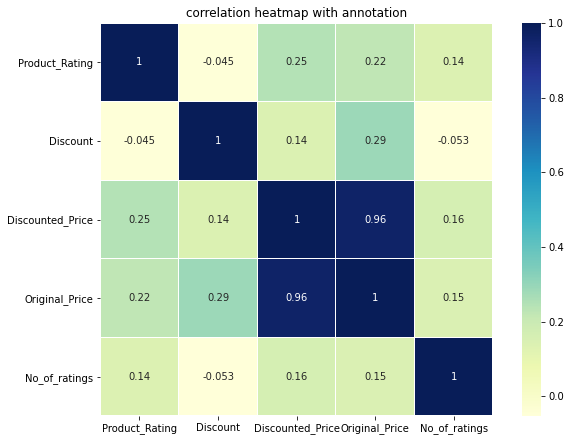

In [61]:
# taking the number of columns in a dataframe
corr_df = products_df[["Product_Rating","Discount", "Discounted_Price","Original_Price","No_of_ratings"]].copy()

n=corr_df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(corr_df.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("correlation heatmap with annotation")
plt.show()

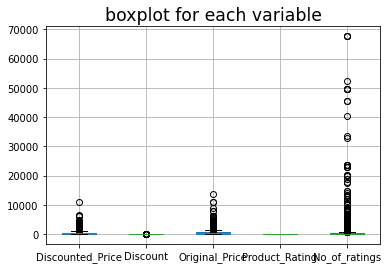

In [62]:
products_df.boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

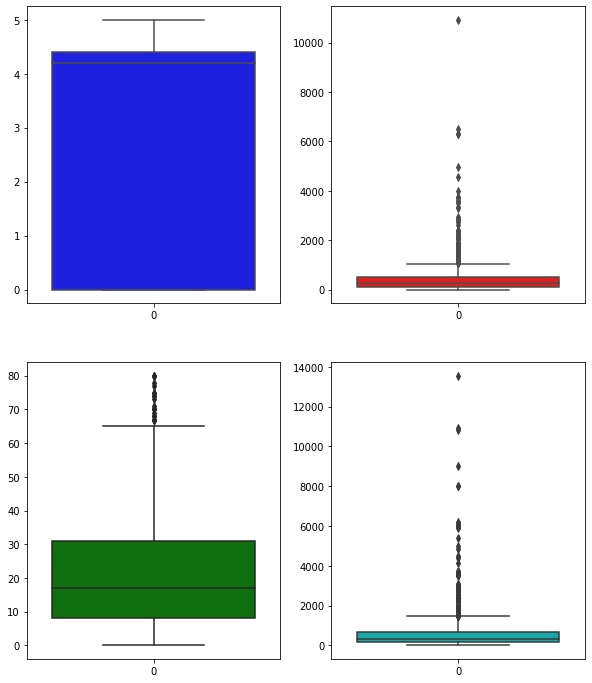

In [63]:
# Creating a seperate dataframe for necessary values those can be plotted.
plotdf = products_df[["Product_Rating","Discount", "Discounted_Price","Original_Price"]].copy()
# bollywood[["YoutubeViews","YoutubeLikes","YoutubeDislikes","Budget","BoxOfficeCollection","ReleaseTime"]].copy();
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink']

# defining the plot area into 3 rows and 2 columns with each plot size with 10x10 size.
# sharex=False represents, they don't share the common X axis.
# precisely, every feature's x-axis is independent of itself
f, axes = plt.subplots(2, 2, figsize=(10, 12), sharex=False)
for i, feature in enumerate(plotdf.columns):
    # boxplot takes first argument as column name data of dataset to represent the graph
    # color here is displayed using Array
    # ax specifies the plot block where it needs to get rendered.
    sns.boxplot(data = plotdf[feature] , color=colors[i], ax=axes[i%2, i//2])